In [215]:
#Imports
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import spacy
import re

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, classification_report
from sklearn.svm import SVC
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
#Downloads

# Agenda

1. Dataset Loading
2. Text Preprocessing
- Lowercasing
- Removing special characters, numbers, and punctuation
- Tokenization
- Stopword Removal
- Lemmatization
3. Feature Extraction with TF-IDF
4. Model Training
- Naive Bayes
- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest
5. Model Evaluation
6. Result visualization
7. Fine Tuning of the best model

### 1. Dataset Loading

In [8]:
categories = ["rec.autos", "rec.sport.hockey", "sci.crypt", "sci.electronics", "sci.med"]
news_groups = fetch_20newsgroups(subset = "train",  categories = categories, remove=("headers", "footers", "quotes"))

In [19]:
#Checking the shapes
print(news_groups.filenames.shape)
print(news_groups.target.shape)

(2974,)
(2974,)


In [47]:
#Printing one example
print(news_groups.data[0])

If anyone out there has an HP180 series scope or mainframe, I
have the TDR plug in (the 1810, I believe) for it and have no need
to keep it. Interested? E-mail me.

-- 
--------------------------------------------------------------------
       Dave Medin			Phone:	(205) 730-3169 (w)
    SSD--Networking				(205) 837-1174 (h)
    Intergraph Corp.
       M/S GD3004 		Internet: dtmedin@catbyte.b30.ingr.com
  Huntsville, AL 35894		UUCP:  ...uunet!ingr!b30!catbyte!dtmedin

   ******* Everywhere You Look (at least around my office) *******


In [48]:
#Printing the category of this example
news_groups.target_names[news_groups.target[0]]

'sci.electronics'

### 2. Text Preprocessing

##### - Lowercasing

In [88]:
lowercased_text = [article.lower() for article in news_groups.data]
print(lowercased_text[0])

if anyone out there has an hp180 series scope or mainframe, i
have the tdr plug in (the 1810, i believe) for it and have no need
to keep it. interested? e-mail me.

-- 
--------------------------------------------------------------------
       dave medin			phone:	(205) 730-3169 (w)
    ssd--networking				(205) 837-1174 (h)
    intergraph corp.
       m/s gd3004 		internet: dtmedin@catbyte.b30.ingr.com
  huntsville, al 35894		uucp:  ...uunet!ingr!b30!catbyte!dtmedin

   ******* everywhere you look (at least around my office) *******


##### - Special characters removal

In [86]:
cleaned_text = [re.sub(r"[^a-zA-Z\s]", " ", text) for text in lowercased_text]

In [89]:
print(cleaned_text[0])

if anyone out there has an hp    series scope or mainframe  i
have the tdr plug in  the       i believe  for it and have no need
to keep it  interested  e mail me 

   
                                                                    
       dave medin			phone 	                w 
    ssd  networking				                h 
    intergraph corp 
       m s gd     		internet  dtmedin catbyte b   ingr com
  huntsville  al      		uucp      uunet ingr b   catbyte dtmedin

           everywhere you look  at least around my office         


##### - Tokenization

In [90]:
tokens = [word_tokenize(article) for article in cleaned_text]

In [91]:
print(tokens[0])

['if', 'anyone', 'out', 'there', 'has', 'an', 'hp', 'series', 'scope', 'or', 'mainframe', 'i', 'have', 'the', 'tdr', 'plug', 'in', 'the', 'i', 'believe', 'for', 'it', 'and', 'have', 'no', 'need', 'to', 'keep', 'it', 'interested', 'e', 'mail', 'me', 'dave', 'medin', 'phone', 'w', 'ssd', 'networking', 'h', 'intergraph', 'corp', 'm', 's', 'gd', 'internet', 'dtmedin', 'catbyte', 'b', 'ingr', 'com', 'huntsville', 'al', 'uucp', 'uunet', 'ingr', 'b', 'catbyte', 'dtmedin', 'everywhere', 'you', 'look', 'at', 'least', 'around', 'my', 'office']


##### - Stopword Removal

In [92]:
#Initializing the stop_words
stop_words = set(stopwords.words("english"))

#Creating a list
filtered_tokens = []

#Using a for-loop to iterate the news
for article_tokens in tokens:
    words = [word for word in article_tokens if word not in stop_words]
    filtered_tokens.append(words)

In [93]:
print(filtered_tokens[0])

['anyone', 'hp', 'series', 'scope', 'mainframe', 'tdr', 'plug', 'believe', 'need', 'keep', 'interested', 'e', 'mail', 'dave', 'medin', 'phone', 'w', 'ssd', 'networking', 'h', 'intergraph', 'corp', 'gd', 'internet', 'dtmedin', 'catbyte', 'b', 'ingr', 'com', 'huntsville', 'al', 'uucp', 'uunet', 'ingr', 'b', 'catbyte', 'dtmedin', 'everywhere', 'look', 'least', 'around', 'office']


##### - Function for all steps

In [94]:
def text_preprocessing(text):
    lowercased_text = text.lower()
    cleaned_text = re.sub(r"[^a-zA-Z]", " ", lowercased_text)
    tokens = word_tokenize(cleaned_text)
    words = [word for word in tokens if word not in stop_words]
    return " ".join(words)

In [95]:
text_preprocessing(news_groups.data[0])

'anyone hp series scope mainframe tdr plug believe need keep interested e mail dave medin phone w ssd networking h intergraph corp gd internet dtmedin catbyte b ingr com huntsville al uucp uunet ingr b catbyte dtmedin everywhere look least around office'

##### - Lemmatization

In [97]:
# Initializing the English model
nlp = spacy.load("en_core_web_sm")

In [99]:
for article in filtered_tokens:
    print(article)
    break

['anyone', 'hp', 'series', 'scope', 'mainframe', 'tdr', 'plug', 'believe', 'need', 'keep', 'interested', 'e', 'mail', 'dave', 'medin', 'phone', 'w', 'ssd', 'networking', 'h', 'intergraph', 'corp', 'gd', 'internet', 'dtmedin', 'catbyte', 'b', 'ingr', 'com', 'huntsville', 'al', 'uucp', 'uunet', 'ingr', 'b', 'catbyte', 'dtmedin', 'everywhere', 'look', 'least', 'around', 'office']


In [101]:
# Create a list for the lemmatized words
lemmatized_tokens = []

# For Loop for the lemmatization
for article in filtered_tokens:
    article_text = " ".join(article)
    doc = nlp(article_text)
    lemmatized_words = [token.lemma_ for token in doc]
    lemmatized_tokens.append(" ".join(lemmatized_words))

In [105]:
lemmatized_tokens[0]

'anyone hp series scope mainframe tdr plug believe need keep interested e mail dave medin phone w ssd network h intergraph corp gd internet dtmedin catbyte b ingr com huntsville al uucp uunet ingr b catbyte dtmedin everywhere look least around office'

### 3. Feature Extraction with TF-IDF

In [115]:
#Initializing the Tf-Idf Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

#Fitting the data
X_tfidf = tfidf_vectorizer.fit_transform(lemmatized_tokens)
print(X_tfidf)

  (0, 3109)	0.13128972566790537
  (0, 259)	0.10129332254415166
  (0, 2522)	0.10366743476900628
  (0, 2602)	0.08283665326117537
  (0, 1545)	0.16085177384999225
  (0, 4750)	0.16931739657518186
  (0, 4749)	0.17228950162831658
  (0, 123)	0.1365061828316163
  (0, 2118)	0.18146931206011138
  (0, 825)	0.10829241718907527
  (0, 2228)	0.36293862412022276
  (0, 653)	0.36745445881328187
  (0, 1356)	0.36745445881328187
  (0, 2303)	0.1352139458615303
  (0, 1863)	0.18372722940664094
  (0, 983)	0.15982588233516806
  (0, 2297)	0.17390187804411347
  (0, 2987)	0.12626901528483417
  (0, 4210)	0.18372722940664094
  (0, 3317)	0.10536899015944598
  (0, 2737)	0.18372722940664094
  (0, 1098)	0.14707587573325293
  (0, 2639)	0.1049338827009212
  (0, 2291)	0.117622275355615
  (0, 2415)	0.10104145562430007
  :	:
  (2973, 4229)	0.07615346283438947
  (2973, 1541)	0.14264507080480296
  (2973, 4564)	0.09378942575181602
  (2973, 2371)	0.09407684049182226
  (2973, 971)	0.11300468056108538
  (2973, 7)	0.1338906609738620

In [116]:
print(X_tfidf.shape)

(2974, 5000)


### 4. Model Training

In [122]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, news_groups.target, train_size=0.7, random_state=42)

#Checking the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2081, 5000)
(893, 5000)
(2081,)
(893,)


##### - Naive Bayes

In [124]:
#Initializing the NB Model
nb_model = MultinomialNB()

#Fitting the train data on the NB Model
nb_model.fit(X_train, y_train)

#Predicting the output from the test data
y_pred_nb = nb_model.predict(X_test)

##### - Logistic Regression

In [126]:
#Initializing the Logistig Regression Model
lr_model = LogisticRegression()

#Fitting the train data on the NB Model
lr_model.fit(X_train, y_train)

#Predicting the output from the test data
y_pred_lr = lr_model.predict(X_test)

##### - Support Vector Machine (SVM)

In [130]:
#Initializing the Logistig Regression Model
svc_model = SVC()

#Fitting the train data on the NB Model
svc_model.fit(X_train, y_train)

#Predicting the output from the test data
y_pred_svc = svc_model.predict(X_test)

##### - Random Forest

In [132]:
#Initializing the Logistig Regression Model
rf_model = RandomForestClassifier()

#Fitting the train data on the NB Model
rf_model.fit(X_train, y_train)

#Predicting the output from the test data
y_pred_rf = rf_model.predict(X_test)

### 5. Model Evaluation

In [189]:
#Function for evaluation
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
def model_evaluation(y_true, y_predicted, model_name):
    print(f"Evaluation of the model: {model_name}")
    
    accuracy = accuracy_score(y_true, y_predicted)*100
    accuracy_scores.append(accuracy)
    print(f"Accuracy: {accuracy:.2f}%")
    
    precision = precision_score(y_true, y_predicted, average='macro')*100
    precision_scores.append(precision)
    print(f"Precision: {precision:.2f}%")
    
    recall = recall_score(y_true, y_predicted, average='macro')*100
    recall_scores.append(recall)
    print(f"Recall: {recall:.2f}%")
    
    f1 = f1_score(y_true, y_predicted, average='macro')*100
    f1_scores.append(f1)
    print(f"F1-score: {f1:.2f}%")

In [190]:
#Naive Bayes Evaluation
model_evaluation(y_test, y_pred_nb, "Naive Bayes")

Evaluation of the model: Naive Bayes
Accuracy: 87.79%
Precision: 87.93%
Recall: 87.91%
F1-score: 87.70%


In [191]:
#Logistic Regression Evaluation
model_evaluation(y_test, y_pred_lr, "Logistic Regression")

Evaluation of the model: Logistic Regression
Accuracy: 86.90%
Precision: 87.68%
Recall: 86.93%
F1-score: 87.16%


In [192]:
#SVC Evaluation
model_evaluation(y_test, y_pred_svc, "SVC")

Evaluation of the model: SVC
Accuracy: 85.89%
Precision: 87.08%
Recall: 85.87%
F1-score: 86.23%


In [193]:
#Random Forest Evaluation
model_evaluation(y_test, y_pred_rf, "Random Forest")

Evaluation of the model: Random Forest
Accuracy: 79.84%
Precision: 81.49%
Recall: 79.97%
F1-score: 80.40%


### 6. Result visualization

In [195]:
models = ["Naive Bayes", "Logistic Regression", "SVC", "Random Forest"]

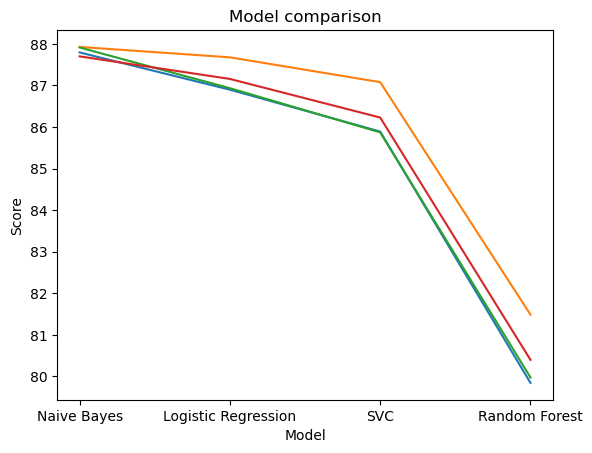

In [201]:
plt.plot(models, accuracy_scores)
plt.plot(models, precision_scores)
plt.plot(models, recall_scores)
plt.plot(models, f1_scores)

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model comparison")

plt.show()

### 7. Fine Tuning of the best model

In [206]:
#GridSearch parameters

param_grid = {
    "alpha": [0.1, 0.5, 1, 2],
    "fit_prior": [True, False]
}

In [207]:
#GridSearch

grid_search = GridSearchCV(estimator = nb_model, param_grid=param_grid, scoring="f1_weighted", cv=5, verbose=1)

#Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1, 2], 'fit_prior': [True, False]},
             scoring='f1_weighted', verbose=1)

In [211]:
#Best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_*100:.2f}%")

Best parameters: {'alpha': 0.1, 'fit_prior': False}
Best score: 89.28%


In [214]:
#Evaluation on test data
best_model = grid_search.best_estimator_

#Predicting with the best model
y_predicted = best_model.predict(X_test)
print(f"F1-score on test data: {f1_score(y_test, y_predicted, average='macro')*100:.2f}%")

F1-score on test data: 88.89%


In [216]:
#Classification report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       175
           1       0.95      0.90      0.92       161
           2       0.92      0.93      0.92       181
           3       0.87      0.83      0.85       185
           4       0.94      0.91      0.92       191

    accuracy                           0.89       893
   macro avg       0.89      0.89      0.89       893
weighted avg       0.89      0.89      0.89       893

